In [9]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import math

sys.path.append('..')
from utilities import *
from util_CFOcorr import *
nSubC = 256
lenCP = 64
samplingRate = 20e6

In [10]:
load_out = np.fromfile('/project/iarpa/dataset/cyclo_modul_OFDM/wlanHE_Extended_16qam/wlanHE_Extended_16_0_20_20_0.4_1.32cf',\
    dtype=np.float32)
data = load_out[np.arange(0, load_out.shape[0], 2)] +\
    1j * load_out[np.arange(1, load_out.shape[0], 2)]

inputIQ = data[2000:]
print(inputIQ.shape[0])
firstIndexSym = findFirstIndex(inputIQ, nSubC, lenCP)

6000
160


29083.197118955868
1005.2838913804353


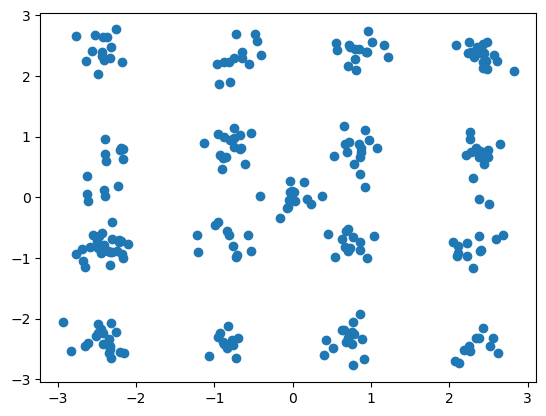

In [11]:
CFOest = estCFO(inputIQ, nSubC, lenCP, firstIndexSym, samplingRate)
print(CFOest)
inputIQCFO = np.multiply(inputIQ, np.exp(-1j*2*math.pi*CFOest/samplingRate*np.arange(inputIQ.shape[0])))

CFOest2 = estCFO(inputIQCFO, nSubC, lenCP, firstIndexSym, samplingRate)
print(CFOest2)
inputIQCFOCFO = np.multiply(inputIQCFO, np.exp(-1j*2*math.pi*CFOest2/samplingRate*np.arange(inputIQ.shape[0])))
a = np.fft.fft(inputIQCFOCFO[firstIndexSym+64:firstIndexSym+320])
plt.scatter(np.real(a), np.imag(a))